# Fine tuning the pre-trained BERT for question-answering

To fine-tune the BERT model for our task, our model has to understand the starting and ending index of the text span containing the answer in the given
paragraph. For example, take the question, 'What is the immune system?' If our model understands that the answer to this question starts from 
index 4 (a) and ends at index 21 (disease), then we can get the answer as shown here:

Paragraph: The immune system is a system of many biological structures and processes within an organism that protects against disease biological 
structures and processes within an organism that protects against disease. To function properly, an immune system must detect a wide variety of agents,
known as pathogens, from viruses to parasitic worms, and distinguish them from the organism's own healthy tissue.

Finding the starting and ending index of the text span
Now, how do we find the starting and ending index of the text span containing the answer? If we get the probability of each token (word) in the
paragraph of being the starting and ending token (word) of the answer, then we can easily extract the answer, right? Yes, but how we can achieve this?
To do this, we use two vectors called the start vector S and the end vector E.The values of the start and end vectors will be learned during training.

Computing the probability of each token as the starting token : First, we compute the probability of each token (word) in the paragraph being the 
starting token of the answer.Next, we compute the starting index by selecting the index of the token that has a high probability of being the starting
token.

Computing the probability of each token as the ending token : Similarly, we compute the probability of each token (word) in the paragraph being the
ending token of the answer. Next, we compute the ending index by selecting the index of the token that has a high probability of being the ending 
token. We can now select the text span containing the answer using the starting and ending index.

Getting the result : After computing the embedding, we compute the dot product with the start/end vectors, apply the softmax function, and obtain the 
probabilities of each token in the paragraph being the start/end word as shown below . From the preceding figure, we can see how we compute the
probability of each token in the paragraph being the start/end word. Next, we select the text span containing the answer using the starting and
ending indexes with the highest probability.

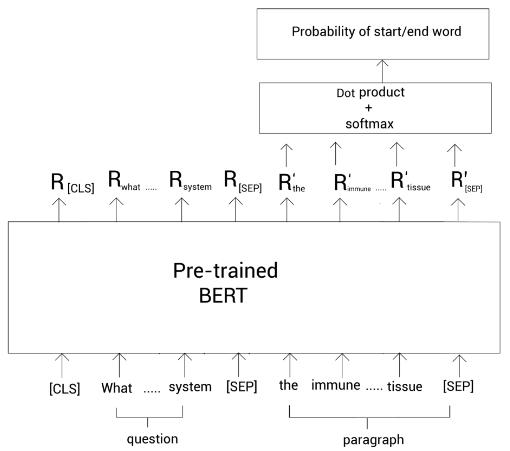


In [1]:
# Suppressing "INFO" and "WARNING" messages by setting the verbosity of the Transformers library.
from transformers import logging
logging.set_verbosity_error()

# Importing the necessary libraries

In [2]:
import torch
from transformers import BertForQuestionAnswering, BertTokenizer

# Loading the model and tokenizer

In [3]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

# Preprocessing the input

First, we define the input to BERT, which is the question and paragraph text

Add a [CLS] token to the beginning of the question and a [SEP] token to the end of both the question and the paragraph

Now, tokenize the question and paragraph

Combine the question and paragraph tokens and convert them to input_ids

Next, we define segment_ids. Now, segment_ids will be 0 for all the tokens of the question and 1 for all the tokens of the paragraph

Now we convert input_ids and segment_ids to tensors . After this we can feed it to the model

In [6]:
question = "What is the immune system?"
paragraph = "The immune system is a system of many biological structures and processes within an organism that protects against disease. To function properly, an immune system must detect a wide variety of agents, known as pathogens, from viruses to parasitic worms, and distinguish them from the organism's own healthy tissue."

In [7]:
question = '[CLS] ' + question + '[SEP]'
paragraph = paragraph + '[SEP]'

In [8]:
question_tokens = tokenizer.tokenize(question)
paragraph_tokens = tokenizer.tokenize(paragraph)

In [9]:
print(question_tokens)
print(paragraph_tokens)

['[CLS]', 'what', 'is', 'the', 'immune', 'system', '?', '[SEP]']
['the', 'immune', 'system', 'is', 'a', 'system', 'of', 'many', 'biological', 'structures', 'and', 'processes', 'within', 'an', 'organism', 'that', 'protects', 'against', 'disease', '.', 'to', 'function', 'properly', ',', 'an', 'immune', 'system', 'must', 'detect', 'a', 'wide', 'variety', 'of', 'agents', ',', 'known', 'as', 'pathogen', '##s', ',', 'from', 'viruses', 'to', 'parasitic', 'worms', ',', 'and', 'distinguish', 'them', 'from', 'the', 'organism', "'", 's', 'own', 'healthy', 'tissue', '.', '[SEP]']


In [10]:
tokens = question_tokens + paragraph_tokens 
input_ids = tokenizer.convert_tokens_to_ids(tokens)

In [16]:
print(tokens)
print(input_ids)

['[CLS]', 'what', 'is', 'the', 'immune', 'system', '?', '[SEP]', 'the', 'immune', 'system', 'is', 'a', 'system', 'of', 'many', 'biological', 'structures', 'and', 'processes', 'within', 'an', 'organism', 'that', 'protects', 'against', 'disease', '.', 'to', 'function', 'properly', ',', 'an', 'immune', 'system', 'must', 'detect', 'a', 'wide', 'variety', 'of', 'agents', ',', 'known', 'as', 'pathogen', '##s', ',', 'from', 'viruses', 'to', 'parasitic', 'worms', ',', 'and', 'distinguish', 'them', 'from', 'the', 'organism', "'", 's', 'own', 'healthy', 'tissue', '.', '[SEP]']
tensor([[  101,  2054,  2003,  1996, 11311,  2291,  1029,   102,  1996, 11311,
          2291,  2003,  1037,  2291,  1997,  2116,  6897,  5090,  1998,  6194,
          2306,  2019, 15923,  2008, 18227,  2114,  4295,  1012,  2000,  3853,
          7919,  1010,  2019, 11311,  2291,  2442, 11487,  1037,  2898,  3528,
          1997,  6074,  1010,  2124,  2004, 26835,  2015,  1010,  2013, 18191,
          2000, 26045, 16253,  

In [11]:
segment_ids = [0] * len(question_tokens)
segment_ids += [1] * len(paragraph_tokens)

In [17]:
print(segment_ids)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [12]:
input_ids = torch.tensor([input_ids])
segment_ids = torch.tensor([segment_ids])

In [18]:
print(input_ids)
print(segment_ids)

tensor([[  101,  2054,  2003,  1996, 11311,  2291,  1029,   102,  1996, 11311,
          2291,  2003,  1037,  2291,  1997,  2116,  6897,  5090,  1998,  6194,
          2306,  2019, 15923,  2008, 18227,  2114,  4295,  1012,  2000,  3853,
          7919,  1010,  2019, 11311,  2291,  2442, 11487,  1037,  2898,  3528,
          1997,  6074,  1010,  2124,  2004, 26835,  2015,  1010,  2013, 18191,
          2000, 26045, 16253,  1010,  1998, 10782,  2068,  2013,  1996, 15923,
          1005,  1055,  2219,  7965,  8153,  1012,   102]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


# Getting the results

We feed input_ids and segment_ids to the model, which returns the start score and end score for all of the tokens

Now, we select start_index, which is the index of the token that has the highest start score, and end_index, which is the index of the token that has 
the highest end score

That's it! Now, we print the text span between the start and end indexes as our answer


In [13]:
objects = model(input_ids, token_type_ids = segment_ids)
start_scores = objects.start_logits
end_scores = objects.end_logits

In [19]:
print(objects)
print(start_scores)
print(end_scores)

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-6.2588, -4.6880, -6.7744, -6.3712, -5.8096, -8.4909, -9.0369, -6.2588,
          2.3760, -0.8670, -4.0859,  2.1112,  7.0353,  3.1633, -2.0016,  1.8844,
          2.4239, -0.8321, -4.7245, -0.6628, -0.9607, -1.5406, -0.9789, -1.5247,
          1.5805, -3.6135, -1.7062, -6.2587, -4.3460, -5.7781, -6.2772, -7.2236,
         -2.5216, -2.8306, -5.5702, -4.4567, -3.9796, -6.1513, -5.8940, -6.4212,
         -7.3876, -5.6694, -7.7685, -4.6375, -6.5613, -3.7148, -7.0651, -8.1083,
         -5.4551, -4.3829, -7.9004, -4.8883, -5.8361, -7.9597, -6.8583, -4.6028,
         -7.3392, -7.3848, -6.5887, -5.8965, -5.8692, -7.9263, -6.7758, -5.4052,
         -5.2147, -7.6892, -6.2588]], grad_fn=<CloneBackward0>), end_logits=tensor([[-0.9886, -4.8667, -6.2903, -7.4715, -6.2248, -4.1261, -6.7786, -0.9885,
         -4.3361, -4.3006, -0.9956, -4.1916, -2.0522,  0.1625, -3.4849, -3.4991,
         -0.9854,  1.9729, -4.0725,  4.2137, -1.7283, -3.0363

In [14]:
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)

In [20]:
print(start_index)
print(end_index)

tensor(12)
tensor(26)


In [15]:
print(' '.join(tokens[start_index:end_index+1]))

a system of many biological structures and processes within an organism that protects against disease
